In [36]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

In [37]:
#importing/reading dataset
churn = pd.read_csv('Telco_Churn.csv')

In [38]:
#view the first few rows of dataset and and overview of all features
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
#helping to identify the Datatype and total value inclusing null
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [40]:
#Changing the datatype for TotalCharges as this features having as dtype object
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors= 'coerce')

In [41]:
#basic Statistics summary
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [42]:
#Creating the loop for looking the unique values 
for i in churn.columns:
    if churn[i].dtype=='0':
        print(f"unique {i}'s count: {churn[i].nunique()}")
        print(f"{churn[i].unique()}'\n")
    else:
        pass

In [43]:
#Indentifying the Null values from data set
# only one feature having few null values
churn.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [44]:
#Droping all the Null values related to all features
churn = churn.dropna(how='any', subset = ['TotalCharges'])

In [45]:
#Looking unique count of feature in Churn 
churn.groupby('Churn')['customerID'].nunique().sort_values(ascending=False)

Churn
No     5163
Yes    1869
Name: customerID, dtype: int64

In [46]:
# importing the graph/ploting style
plt.style.use("Solarize_Light2")

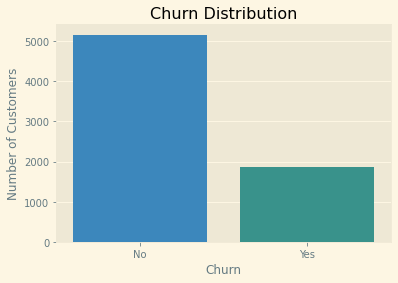

In [47]:
#Ploting the Churn distribution for the all customers
cd = sns.countplot(x=churn['Churn'], data = churn)
cd.set_ylabel('Number of Customers')
cd.set_xlabel('Churn')
cd.set_title('Churn Distribution')
plt.show()

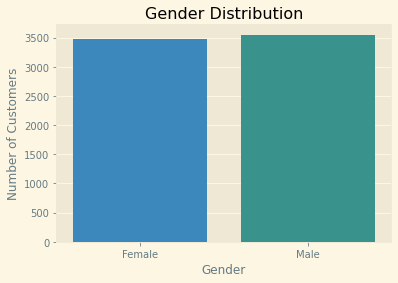

In [48]:
#Ploting the Gender distribution for the all customers
cd = sns.countplot(x=churn['gender'], data = churn)
cd.set_ylabel('Number of Customers')
cd.set_xlabel('Gender')
cd.set_title('Gender Distribution')
plt.show()

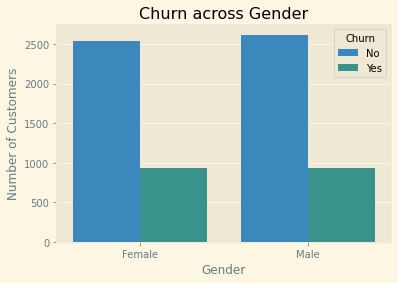

In [49]:
#Ploting the Gender distribution with across Churn 
cd = sns.countplot(x=churn['gender'], hue = churn['Churn'], data = churn)
cd.set_ylabel('Number of Customers')
cd.set_xlabel('Gender')
cd.set_title('Churn across Gender')
plt.show()

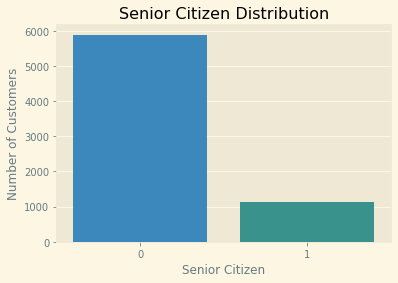

In [50]:
#Ploting the Senior Citizen distribution for the all customers
cd = sns.countplot(x=churn['SeniorCitizen'], data = churn)
cd.set_ylabel('Number of Customers')
cd.set_xlabel('Senior Citizen')
cd.set_title('Senior Citizen Distribution')
plt.show()

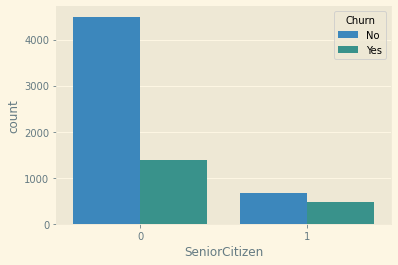

In [51]:
#Ploting the Senior Citizen distribution with churn count
cd = sns.countplot(x=churn['SeniorCitizen'], hue = churn['Churn'], data = churn)
plt.show()

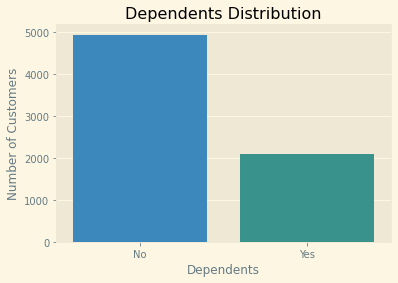

In [52]:
#Ploting the Dependents distribution for the all customers
cd = sns.countplot(x=churn['Dependents'], data = churn)
cd.set_ylabel('Number of Customers')
cd.set_xlabel('Dependents')
cd.set_title('Dependents Distribution')
plt.show()

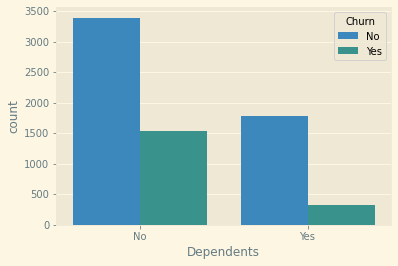

In [53]:
#Ploting the Dependents distribution with churn count
cd = sns.countplot(x=churn['Dependents'], hue = churn['Churn'], data = churn)
plt.show()

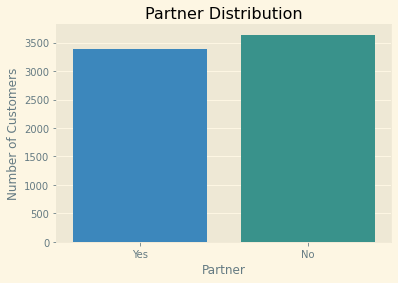

In [54]:
#Ploting the Partner distribution for the all customers
cd = sns.countplot(x=churn['Partner'], data = churn)
cd.set_ylabel('Number of Customers')
cd.set_xlabel('Partner')
cd.set_title('Partner Distribution')
plt.show()

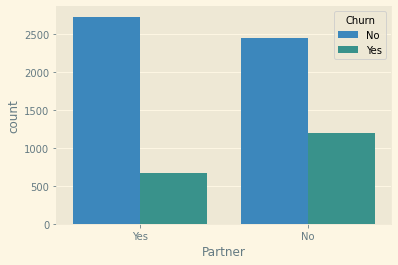

In [55]:
#Ploting the Partner distribution with churn count
cd = sns.countplot(x=churn['Partner'], hue = churn['Churn'], data = churn)
plt.show()

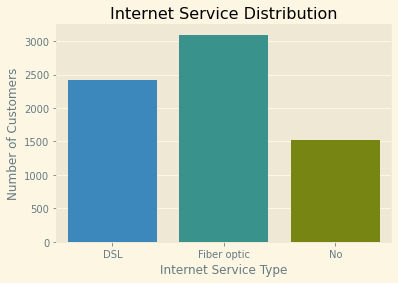

In [56]:
#Ploting the Internet Service distribution for the all customers
cd = sns.countplot(x=churn['InternetService'], data = churn)
cd.set_ylabel('Number of Customers')
cd.set_xlabel('Internet Service Type')
cd.set_title('Internet Service Distribution')
plt.show()      

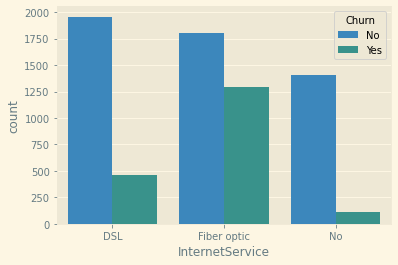

In [57]:
#Ploting the Internet Service distribution with churn count
cd = sns.countplot(x=churn['InternetService'], hue = churn['Churn'], data = churn)
plt.show()

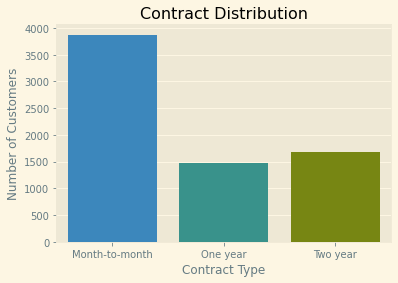

In [58]:
#Ploting the Contract distribution for the all customers
cd = sns.countplot(x=churn['Contract'], data = churn)
cd.set_ylabel('Number of Customers')
cd.set_xlabel('Contract Type')
cd.set_title('Contract Distribution')
plt.show()                

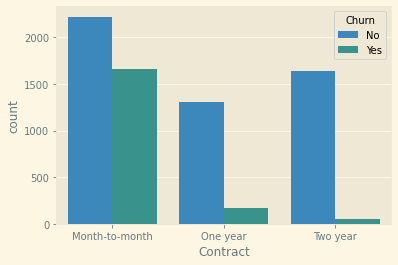

In [59]:
#Ploting the Contract distribution with churn count
cd = sns.countplot(x=churn['Contract'], hue = churn['Churn'], data = churn)
plt.show()

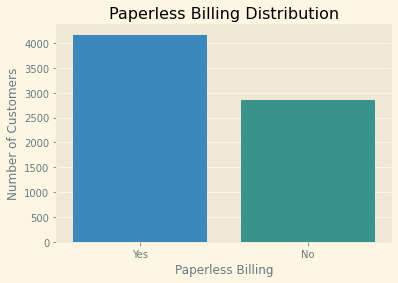

In [60]:
#Ploting the Paperless Billing distribution for the all customers
cd = sns.countplot(x=churn['PaperlessBilling'], data = churn)
cd.set_ylabel('Number of Customers')
cd.set_xlabel('Paperless Billing')
cd.set_title('Paperless Billing Distribution')
plt.show()      

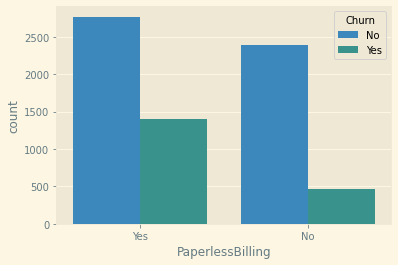

In [61]:
#Ploting the Paperless Billing distribution with churn count
cd = sns.countplot(x=churn['PaperlessBilling'], hue = churn['Churn'], data = churn)
plt.show()

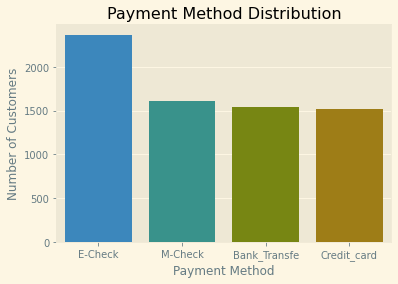

In [62]:
#Ploting the Payment Method distribution for the all customers
#Renaming the Feature of Payment method to better understand and better plot
pyments = {"Electronic check":'E-Check', "Mailed check":'M-Check', "Bank transfer (automatic)":'Bank_Transfe', "Credit card (automatic)":'Credit_card'}
churn['PaymentMethod'].replace(pyments, inplace=True)
cd = sns.countplot(x=churn['PaymentMethod'], data = churn)
cd.set_ylabel('Number of Customers')
cd.set_xlabel('Payment Method')
cd.set_title('Payment Method Distribution')
plt.show()        

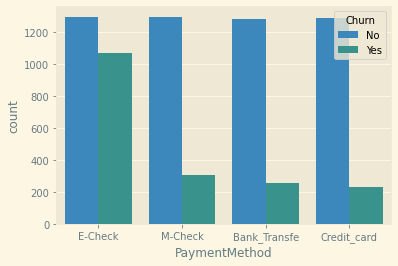

In [63]:
#Ploting the Payment Method distribution with churn count
cd = sns.countplot(x=churn['PaymentMethod'], hue = churn['Churn'], data = churn)
plt.show()

# BoxPlot with Churn Distribution

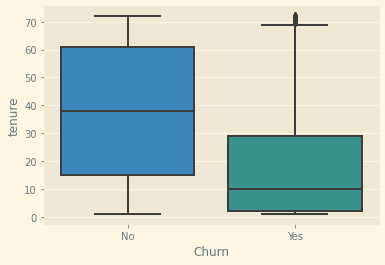

In [64]:
#BoxPlot Tenure distribution with churn count
cb = sns.boxplot(x=churn['Churn'], y=churn['tenure'])
plt.show()

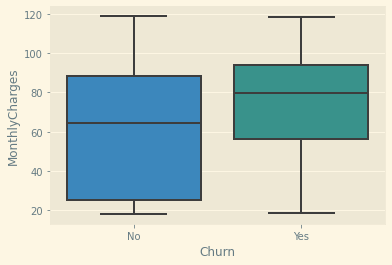

In [65]:
#BoxPlot Monthly Charges distribution with churn count
cb = sns.boxplot(x=churn['Churn'], y=churn['MonthlyCharges'])
plt.show()

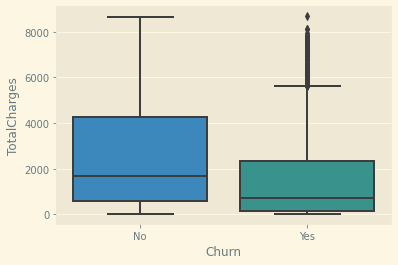

In [66]:
#BoxPlot Total Charges distribution with churn count
cb = sns.boxplot(x=churn['Churn'], y=churn['TotalCharges'])
plt.show()

In [67]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
churn_num = churn[numerical_features]
churn_num.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Its More like to have a good amount of outliers in 'tenure' and 'TotalCharges' features to overcome this issue we perform IQR to resolve the outlier issue as its more important in Dataset.

In [68]:
Q1 = churn_num.quantile(0.25)
Q3 = churn_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((churn_num < (Q1 - 1.5*IQR)) | (churn_num > (Q3 + 1.5*IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

# Feature Engineering

With addition of some important features we make some additional feature creation to make thing more better 

In [69]:
#Making a Feature to work on adding other important feature.
churn['Number of Additional services'] = (churn[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                                 'TechSupport','StreamingTV', 'StreamingMovies']]=="Yes").sum(axis=1)

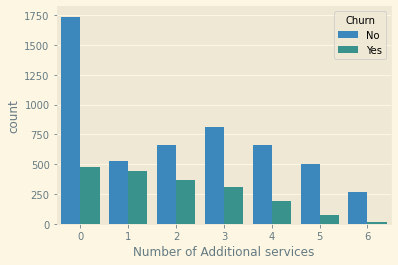

In [70]:
#Ploting the combines Feature to understant the data distribution and it seems churn looks moving in positive way.
cd = sns.countplot(x=churn['Number of Additional services'], hue = churn['Churn'], data = churn)
plt.show()